In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [123]:
# Import the data
df = pd.DataFrame(pd.read_csv('sample_data/Measurement_summary.csv'))

df['hour'] = df['Measurement date'].str.split(' ').str[1].str.split(':').str[0].astype(int)
# df['day'] = df['Measurement date'].str.split(' ').str[0].str.split('-').str[-1].astype(int)
df['month'] = df['Measurement date'].str.split('-').str[1].astype(int)
# df['year'] = df['Measurement date'].str.split('-').str[0].astype(int)

df = df.rename(columns={'PM2.5': 'PM25'})

df = df.drop(['Address','Latitude','Longitude','Measurement date'],axis=1) # 'Station code' already provides a unique
                                    # indice for specific monitoring locations; 'Measurement date' isn't needed.
df = df.dropna()

display(df.dtypes)
display(df.size)

df.head()

Station code      int64
SO2             float64
NO2             float64
O3              float64
CO              float64
PM10            float64
PM25            float64
hour              int64
month             int64
dtype: object

5827599

,Station code,SO2,NO2,O3,CO,PM10,PM25,hour,month
0,101,0.004,0.059,0.002,1.2,73.0,57.0,0,1
1,101,0.004,0.058,0.002,1.2,71.0,59.0,1,1
2,101,0.004,0.056,0.002,1.2,70.0,59.0,2,1
3,101,0.004,0.056,0.002,1.2,70.0,58.0,3,1
4,101,0.003,0.051,0.002,1.2,69.0,61.0,4,1


Data from: https://www.kaggle.com/bappekim/air-pollution-in-seoul

## Least Squares Linear Regression

Let's test the correlation between PM 10 & PM 2.5 (coarse and fine particles).

Following this tutorial: https://benalexkeen.com/linear-regression-in-python-using-scikit-learn/

In [112]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

### Prepare the training and testing sets

In [113]:
# split our dataset between attributes and labels.

X = df.drop('NO2', axis=1)
y = df[['NO2']] # 'PM2.5'

In [114]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [115]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [116]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Station code is 0.0001046190411612127
The coefficient for SO2 is 0.2598437179710563
The coefficient for O3 is 0.7444821067655099
The coefficient for CO is 0.019414304284624154
The coefficient for PM10 is 1.6047116885520296e-05
The coefficient for PM2.5 is 3.835730847731589e-05
The coefficient for hour is -0.0002601930269981723
The coefficient for month is 0.00022846766973905766


In [117]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.01225214842847696


In [118]:
regression_model.score(X_test, y_test)

0.8073410595753603

The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value. It is a risk function, corresponding to the expected value of the squared error loss. It is always non – negative and values close to zero are better. The MSE is the second moment of the error (about the origin) and thus incorporates both the variance of the estimator and its bias.

https://www.geeksforgeeks.org/python-mean-squared-error/

In [119]:
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

0.0013754736719001996

Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit.

https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/#:~:text=Whereas%20R%2Dsquared%20is%20a,of%20RMSE%20indicate%20better%20fit.

In [120]:
import math

math.sqrt(regression_model_mse)

0.03708737887611094

#### Diagnostic for Linear Regression Machine Models?

If you wanted to test somehow the assumptions of linear regression using some method that employs machine learning, you would first need to fit the machine learning algorithm to your data. You would face the problem of assessing the fit of the machine learning algorithm to the data and you would possibly need to check the assumptions of the machine learning algorithm that was used. In machine learning we often do not check the assumptions, people often do not even state them explicitly, but it is not true that those methods do not have any assumptions -- any method does. So by employing machine learning in here, you change the problem definition from checking the assumptions of method A, to checking the assumptions of method B, to verify is assumptions of method A are met. So now two things may go wrong: you may wrongly assume that method B has "converged", or you may make wrong conclusions from the output of method B. Now instead of single test that went wrong, two things may fail! That was the first problem.

The second problem is that when fitting machine learning algorithms, you need to choose, and/or tune the hyperparameters of the model, prepare the features etc., so the result depends on your actions. You don't want to have a "test" that depends on your actions (i.e. if you believe the hypothesis is true, you tune the parameters until the test proves your hypothesis and if you don't, you stop with using default parameters and proclaim you win).

The third problem is that machine learning algorithms are not designed for hypothesis testing. They are designed for classifying, making predictions, clustering etc. They will make their predictions "at all cost", leading to problems like overfitting if something goes wrong. They are not designed for making optimal decisions, since they do not optimize anything that is related to making such decisions (unless you made a classification problem of it, but I'd still argue that it is not how you do testing). Hypothesis tests are designed for testing. Machine learning algorithm return predictions and to make any decision based on the predictions, you need to interpret them. Tests give you clear-cur criteria for this, machine learning don't, so you'd rely on more or less subjective interpretations of the results.


https://stats.stackexchange.com/questions/326907/linear-model-diagnostics-via-machine-learning

## Assumptions in Regression Analysis

Based on: https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/

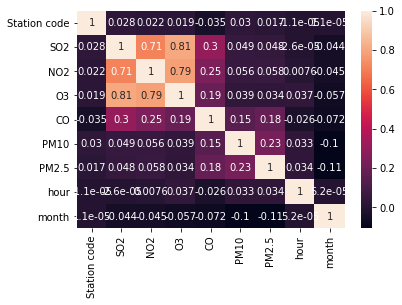

In [121]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [158]:
import statsmodels.formula.api as smf
reg = smf.ols('NO2 ~ PM25 + O3 + CO + PM10 + SO2', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO2   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                 2.304e+05
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:31:14   Log-Likelihood:             8.1171e+05
No. Observations:              647511   AIC:                        -1.623e+06
Df Residuals:                  647505   BIC:                        -1.623e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0009      0.000     -5.592      0.000      -0.001      -0.001
PM25        3.551e-05   2.03e-06     17.472      0.000    3.15e-05    3.95e-05
O3             0.7124      0.001    485.810      0.000       0.710       0.715
CO             0.0187      0.000     81.950      0.000       0.018       0.019
PM10        1.492e-05   1.25e-06     11.955      0.000    1.25e-05    1.74e-05
SO2            0.2867      0.002    150.540      0.000       0.283       0.290
===============================================================================
Omnibus:                  3746129.109   Durbin-Watson:                    1.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   886334759220966.750
Skew:                         368.078   Prob(JB):                          0.00
Kurtosis:                  181252.724   Cond. No.                      2.33e+03
===============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linearity & Equal variance

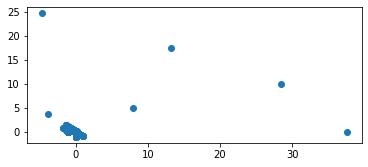

In [159]:
pred_val = reg.fittedvalues.copy()
true_val = df['NO2'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

### Normality

0.1357655824155275

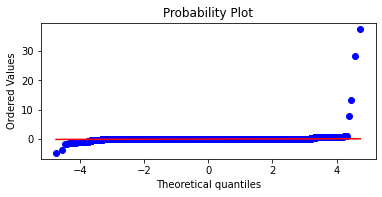

In [160]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

#### Read More:

https://towardsdatascience.com/data-science-you-need-to-know-linear-regression-2b6d966bc4a8